In [148]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image
from sklearn import preprocessing
from sklearn import linear_model
import math

## Boston Housing

In [9]:
prostate = pd.read_table('https://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data')
prostate.head()

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [10]:
del prostate['Unnamed: 0']

In [11]:
prostate.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


### Separating Training and Testing Set

In [12]:
train = prostate[prostate.train == 'T']
test = prostate[prostate.train == 'F']
print('Rows in Training set: %d / Rows in Testing set: %d' % (len(train), len(test)))

Rows in Training set: 67 / Rows in Testing set: 30


### Standardizing All Predictors to Unit Variance 

In [13]:
prostate.svi.unique()

array([0, 1], dtype=int64)

In [14]:
# Since svi is binary variables, even though it will do no harm for the data overall, this course of action will make interpretation process very difficult.
# In this case, I will follow the description in the problem and do standardization.
std_scale = preprocessing.StandardScaler().fit(prostate[['lcavol', 
                                                         'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']])
prostate_std = pd.DataFrame(std_scale.transform(prostate[['lcavol', 
                                                          'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]),
                           columns = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'])
prostate_std.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957
2,-1.587021,-2.200154,1.368234,-1.030029,-0.525657,-0.867655,0.344407,-0.156155
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957


In [15]:
prostate_std['lpsa'] = prostate['lpsa']
prostate_std['train'] = prostate['train']

std_train = prostate_std[prostate_std.train == 'T']
std_test = prostate_std[prostate_std.train == 'F']
prostate_std.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.430783,T
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.162519,T
2,-1.587021,-2.200154,1.368234,-1.030029,-0.525657,-0.867655,0.344407,-0.156155,-0.162519,T
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.162519,T
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,0.371564,T


### Fit Linear Model

In [16]:
lr = linear_model.LinearRegression()
lr.fit(std_train.iloc[:,0:8], std_train.iloc[:,8:9])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
from sklearn.metrics import r2_score
r2_score(std_test.iloc[:,8:9], lr.predict(std_test.iloc[:,0:8]))

0.50337985023818055

In [18]:
print(lr.coef_)

[[ 0.67601634  0.26169361 -0.14073374  0.20906052  0.30362332 -0.28700184
  -0.02119493  0.26557614]]


In [184]:
rmse_lr = (lr.predict(std_test.iloc[:,0:8]) - std_test.iloc[:,8:9]) ** 2
rmse_lr = math.sqrt(np.mean(rmse_lr))

print("Mean squared error: %.2f"
      % (rmse_lr))

Mean squared error: 0.72


#### Ridge Regression (shrinkage parameter: 0.1)

In [20]:
rg = linear_model.Ridge(alpha = 0.1)
rg.fit(std_train.iloc[:,0:8], std_train.iloc[:,8:9])

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [138]:
print('R-squred is: ', r2_score(std_test.iloc[:,8:9], rg.predict(std_test.iloc[:,0:8])))


R-squred is:  0.504295728635


In [139]:
print('coefficient is: ',rg.coef_)

coefficient is:  [[ 0.67364618  0.26170405 -0.14004579  0.20881427  0.30298482 -0.28371428
  -0.02018937  0.26366038]]


In [183]:
rmse_rg = (rg.predict(std_test.iloc[:,0:8]) - std_test.iloc[:,8:9]) ** 2
rmse_rg = math.sqrt(np.mean(rmse_rg))

print("Mean squared error: %.2f"
      % (rmse_rg))

Mean squared error: 0.72


In [ ]:
print("Mean squared error: %.2f"
      % (rmse))

#### Lasso Regression (shrinkage parameter: 0.01)

In [24]:
lasso = linear_model.Lasso(alpha = 0.01)
lasso.fit(std_train.iloc[:,0:8], std_train.iloc[:,8:9])

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
print('R-squred is: ',r2_score(std_test.iloc[:,8:9], lasso.predict(std_test.iloc[:,0:8])))

R-squred is:  0.524656051556


In [142]:
print('coefficient is: ',lasso.coef_)

coefficient is:  [ 0.64738911  0.25763435 -0.12000337  0.19758794  0.28289089 -0.22386563
 -0.          0.21899174]


In [166]:
rmse = (lasso.predict(std_test.iloc[:,0:8]) - std_test.iloc[:,8:9]['lpsa']) ** 2
rmse = math.sqrt(np.mean(rmse))
print("Mean squared error: %.2f"
      % (rmse))

Mean squared error: 0.71


### Comparison

Among three models, I think Lasso regression is the best since it has higher R-squared value and lower MSE value.

### Beyasian Ridge Regression

In [28]:
Bay = linear_model.BayesianRidge()
Bay.fit(std_train.iloc[:,0:8], std_train.iloc[:,8:9])

C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [29]:
r2_score(std_test.iloc[:,8:9], Bay.predict(std_test.iloc[:,0:8]))

0.53135047715711092

In [30]:
print(Bay.coef_)

[ 0.56996407  0.25884364 -0.10646295  0.19503692  0.27373323 -0.14982763
  0.0144862   0.19320578]


In [185]:
rmse_bay = (Bay.predict(std_test.iloc[:,0:8]) - std_test.iloc[:,8:9]['lpsa']) ** 2
rmse_bay = math.sqrt(np.mean(rmse_bay))
print("Mean squared error: %.2f"
      % (rmse_bay))

Mean squared error: 0.70


Beyasian Ridge regression is even better than Lasso regression because it has even higher R-sqaured value and lower RMSE

## Clustering Iris dataset

In [71]:
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
iris = pd.read_csv('https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv')

iris.loc[iris.Name=='Iris-setosa', 'id']= 0
iris.loc[iris.Name=='Iris-versicolor', 'id']= 1
iris.loc[iris.Name=='Iris-virginica', 'id']= 2
iris['id'] = iris['id'].astype(int)
iris.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,id
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [44]:
x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:, 0:4], iris.iloc[:, 5:6],
                                                   test_size = 0.2, random_state = 40)

In [45]:
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Value of K
Value of K is three because there are three different categories of iris

In [46]:
kmeans = KMeans(n_clusters= 3, init='random')
kmeans.fit(x_train, y_train)

KMeans(copy_x=True, init='random', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [47]:
kmeans.labels_

array([1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1,
       1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2,
       1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1])

### Use graph to identify result label and species

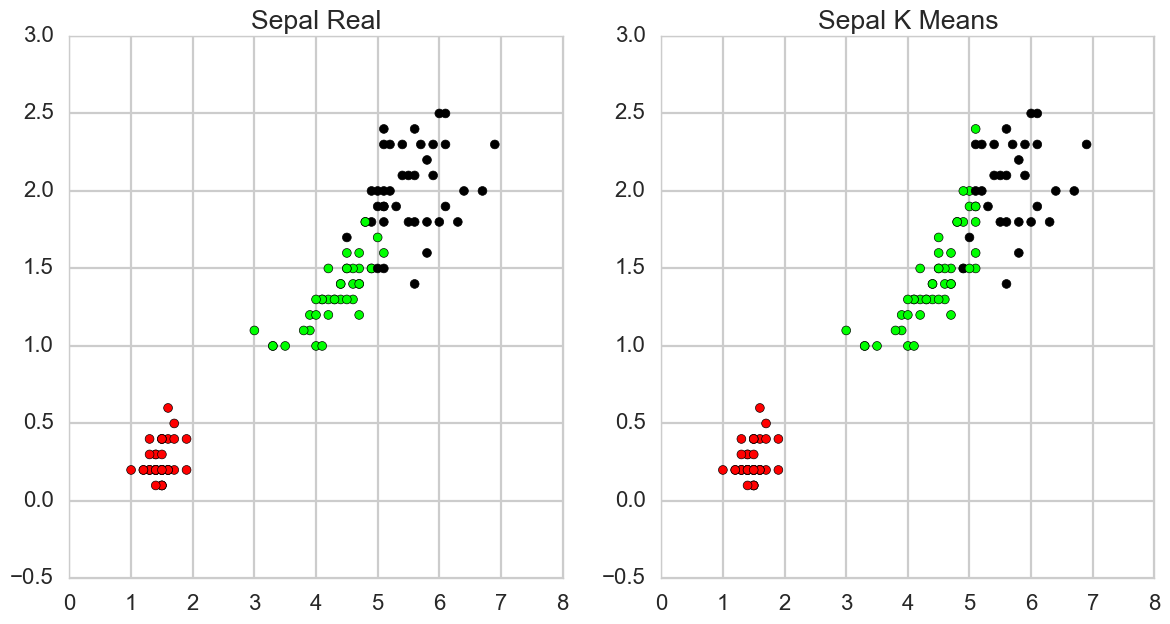

In [48]:
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'lime', 'black'])

# Plot Sepal Real
plt.subplot(1, 2, 1)
plt.scatter(x_train.PetalLength, x_train.PetalWidth, 
            c=colormap[y_train.id], s=40)
plt.title('Sepal Real')

# Plot Sepal Classfication
plt.subplot(1, 2, 2)
plt.scatter(x_train.PetalLength, x_train.PetalWidth, 
            c=colormap[kmeans.labels_], s=40)
plt.title('Sepal K Means')


In [49]:
correct = 0
for i in range(len(y_test)):
    if kmeans.predict(x_test)[i] == y_test.iloc[i,0]:
        correct = correct + 1
        

print('The accuracy of K means in this training/testing set is: %0.2f%%' % (correct / float(len(y_test))))

The accuracy of K means in this training/testing set is: 0.93%


## Select two features and Visualize KMeans

In [50]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
lgr = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(lgr, 2)
rfe = rfe.fit(x_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True]
[3 1 2 1]


C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
iris_2f_x = iris.iloc[:, [1,3]]
kmeans_2f = KMeans(n_clusters= 3, init='random')
kmeans_2f.fit(iris_2f_x)

KMeans(copy_x=True, init='random', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

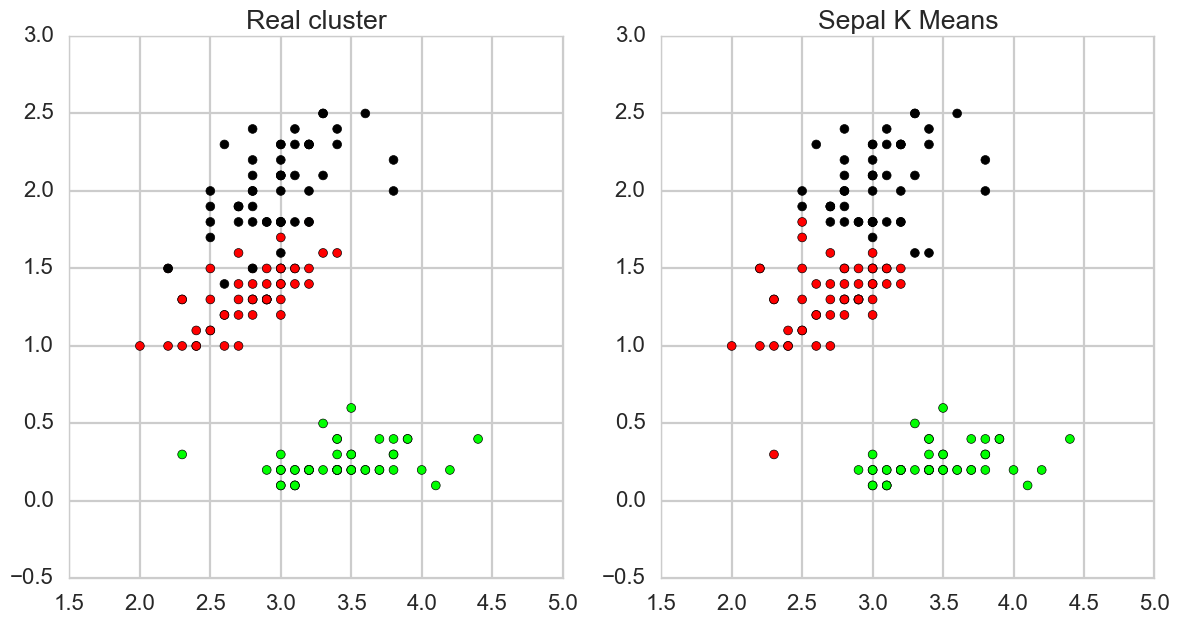

In [74]:
plt.figure(figsize=(14,7))
realY = np.choose(iris.id, [1, 0, 2]).astype(np.int64)

# Create a colormap
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(1, 2, 1)
plt.scatter(iris_2f_x.SepalWidth, iris_2f_x.PetalWidth, 
            c=colormap[realY], s=40)
plt.title('Real cluster')

plt.subplot(1, 2, 2)
plt.scatter(iris_2f_x.SepalWidth, iris_2f_x.PetalWidth, 
            c=colormap[kmeans_2f.labels_], s=40)
plt.title('Sepal K Means')